# Entrega Test Analista Ciberseguridad

### Contenidos

1. Preparación de ambiente de trabajo
2. Manejo inicial de los scans
3. Análisis de los scans
4. Conclusión
5. Trabajo a fúturo

## 1. Preparación de ambiente de trabajo

### Sección de la instalación de librerías e importación de las mismas

In [331]:
# %pip install matplotlib
# %pip install numpy
# %pip install pandas

In [332]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Lectura de scans transformando a dataset pandas. Además, se cambia el tipo de dato de puertos para poder tener una comparativa de cantidad y no base a números lo cual llevaría análisis estádisticos.

In [333]:
# Lectura de los dataset de scans 
scan_feb = pd.read_csv('./reports/scan_feb_2024.csv')
print(scan_feb.shape)
scan_jan = pd.read_csv('./reports/scan_jan_2024.csv')
print(scan_feb.shape)

# Cambiar tipo de dato de puertos a string
scan_feb = scan_feb.astype({"Port":'string'})
scan_jan = scan_jan.astype({"Port":'string'})

# Concatenar ambos scan en un solo dataset
scan_total = pd.concat([scan_jan,scan_feb])
display(scan_total.head())

(1080, 8)
(1080, 8)


,CVE,Risk,Host,Protocol,Port,Name,Description,Solution
0,NaN,NaN,192.168.170.91,tcp,80,HTTP Server Type and Version,This plugin attempts to determine the type and...,NaN
1,NaN,NaN,192.168.170.91,tcp,443,HTTP Server Type and Version,This plugin attempts to determine the type and...,NaN
2,NaN,NaN,192.168.170.91,tcp,4443,HTTP Server Type and Version,This plugin attempts to determine the type and...,NaN
3,NaN,NaN,192.168.170.91,tcp,8000,HTTP Server Type and Version,This plugin attempts to determine the type and...,NaN
4,NaN,NaN,192.168.170.91,tcp,8080,HTTP Server Type and Version,This plugin attempts to determine the type and...,NaN


### Definición de funciones

In [353]:
#Funcion para describir la base de los reportes, en este caso una descipción general
# y la cantidad de filas y columnas
def describe_dataset(dataset):
    print("Descripción de dataset")
    display(dataset.describe())

    print("Cantidad de filas y columnas")
    display(dataset.shape)

#Funcion para limpiar el dataset
def clean_database(dataset):
    if dataset.duplicated().any():
        print("Tenía duplicados")
        dataset_clean = dataset.drop_duplicates(inplace=False)
    dataset_clean_2 = dataset_clean.dropna(subset=['Risk'], inplace=False)
    print("Quedó con el siguiente tamaño", dataset_clean_2.shape)
    return dataset_clean_2

# Funcion para mostrar información relativa para entender mejor los reportes
def display_groupby(dataset):
    print("Cantidad de vulnerabilidades por host")
    display(dataset[["Risk","Host"]].groupby("Host").describe())
    display(dataset[["Risk","Host"]].groupby("Risk").describe())

    print("Cantidad de vulverabilidades agrupado por puertos")
    display(dataset[["Risk","Host","Port"]].groupby("Port").describe())

    print("Vulnerabilidades más repetidas")
    display(dataset[["CVE","Risk"]].groupby("CVE").value_counts().nlargest(10))

    print("Nombre y soluciones")
    display(dataset[["Risk","Name","Solution"]].groupby("Name").describe())

    print("Nombre y soluciones agrupadas por Host")
    display(dataset[["Host","Risk","Name","Solution"]].groupby("Host").describe())


# Función para graficar información relevante a lo pédido en el punto 2.
def plot_gruopby(dataset):
    y = dataset[["Risk"]].value_counts().values
    dataset[["Risk"]].value_counts().plot.pie(y=y,title="Distribución de vulnerabilidades por Riesgo", stacked=True,autopct='%1.0f%%',colors=["#84b6f4","#fdfd96","#ff6961","#77dd77"])
    dataset[["Risk","Host"]].groupby("Host").value_counts().unstack().plot.bar(title="Distribución de vulnerabilidades por Host", width=0.5, stacked=True, color={"Critical":"#ff6961","High":"#fdfd96","Medium":"#84b6f4","Low":"#77dd77"})
    dataset[["Risk","Port"]].groupby("Port").value_counts().unstack().plot.bar(title="Distribución de vulnerabilidades por Port", width=0.5, stacked=True, color={"Critical":"#ff6961","High":"#fdfd96","Medium":"#84b6f4","Low":"#77dd77"})
    dataset[["Port","Host"]].groupby("Host").value_counts().unstack().plot.bar(title="Distribución de Puertos afectados según Host", width=0.5, stacked=True)

# Obtener las filas que tienen más riesgo por cada sección del mismo
def get_risk_ptype(dataset):
    for r in dataset[["Risk"]].value_counts().keys():
        print(r[0], "Risk")
        display(dataset.loc[dataset["Risk"] == r[0]].value_counts())

## 2. Manejo inicial de los scans
#### Descripción resumen del dataset de scans

In [335]:
describe_dataset(scan_total)

Descripción de dataset


,CVE,Risk,Host,Protocol,Port,Name,Description,Solution
count,1154,1246,2171,2171,2171,2171,2171,1462
unique,182,4,7,3,62,152,153,93
top,CVE-2016-2183,Medium,192.168.170.164,tcp,8090,Nessus SYN scanner,This plugin is a SYN 'half-open' port scanner....,Protect your target with an IP filter.
freq,18,602,451,1969,1090,99,99,99


Cantidad de filas y columnas


(2171, 8)

### Limpiar las filas del reporte las cual no presentan riesgo y las duplicadas

Se limpia el dataset de los duplicados y de las filas que no presentan riesgos encontrados por Nessus

In [336]:
cl_scan_total = clean_database(scan_total)

Tenía duplicados
Quedó con el siguiente tamaño (625, 8)


## 3. Análisis de los scans

### 3.1 Análisis genérico

Se muestra la descripción del nuevo reporte, se obtiene la cantidad de vulnerabilidades por host con su riesgo respectivo. Por último se muestra la agrupación por Host con respectivo a los nombres y soluciones de las vulnerabilidades.

In [337]:
display_groupby(cl_scan_total)

Cantidad de vulnerabilidades por host


Risk                    
                count unique     top freq
Host                                     
192.168.170.164   182      4    High   84
192.168.170.204     7      3  Medium    3
192.168.170.211    33      4  Medium   23
192.168.170.213   180      4    High   84
192.168.170.228   178      4    High   83
192.168.170.91     17      4  Medium   11
192.168.170.99     28      4  Medium   22

Host                             
         count unique              top freq
Risk                                       
Critical    39      6  192.168.170.164   12
High       258      7  192.168.170.164   84
Low         25      7  192.168.170.211    5
Medium     303      7  192.168.170.164   83

Cantidad de vulverabilidades agrupado por puertos


Risk                      Host                             
     count unique     top freq count unique              top freq
Port                                                             
123      2      1  Medium    2     2      1  192.168.170.228    2
161     12      2    High    6    12      6   192.168.170.91    2
22      31      3     Low   21    31      7  192.168.170.211    7
443     34      3  Medium   29    34      2  192.168.170.211   21
4443    10      3  Medium    8    10      1   192.168.170.91   10
5353     3      1  Medium    3     3      3   192.168.170.91    1
80      11      1  Medium   11    11      3   192.168.170.99    5
8090   519      3    High  249   519      3  192.168.170.213  174
8443     3      1  Medium    3     3      1   192.168.170.99    3

Vulnerabilidades más repetidas


CVE             Risk  
CVE-2003-1567   Medium    9
CVE-2004-2320   Medium    9
CVE-2010-0386   Medium    9
CVE-2008-5161   Low       7
CVE-1999-0517   High      6
CVE-2008-4309   Medium    6
CVE-2015-4000   Medium    6
CVE-2016-2183   Medium    6
CVE-2021-44790  High      6
CVE-2014-3566   Medium    4
Name: count, dtype: int64

Nombre y soluciones


Risk                      \
                                                   count unique     top freq   
Name                                                                           
Apache 2.2.x < 2.2.33-dev / 2.4.x < 2.4.26 Mult...    15      1    High   15   
Apache 2.4.x < 2.4.27 Multiple Vulnerabilities         6      1  Medium    6   
Apache 2.4.x < 2.4.28 HTTP Vulnerability (Optio...     3      1  Medium    3   
Apache 2.4.x < 2.4.33 Multiple Vulnerabilities        21      1  Medium   21   
Apache 2.4.x < 2.4.34 Multiple Vulnerabilities         6      1  Medium    6   
...                                                  ...    ...     ...  ...   
SSL/TLS EXPORT_RSA <= 512-bit Cipher Suites Sup...     1      1  Medium    1   
SSLv3 Padding Oracle On Downgraded Legacy Encry...     1      1  Medium    1   
TLS Version 1.0 Protocol Detection                     3      1  Medium    3   
TLS Version 1.1 Protocol Deprecated                    1      1  Medium    1   
mDNS Detection (Remote Network)                        3      1  Medium    3   

                                                   Solution         \
                                                      count unique   
Name                                                                 
Apache 2.2.x < 2.2.33-dev / 2.4.x < 2.4.26 Mult...       15      1   
Apache 2.4.x < 2.4.27 Multiple Vulnerabilities            6      1   
Apache 2.4.x < 2.4.28 HTTP Vulnerability (Optio...        3      1   
Apache 2.4.x < 2.4.33 Multiple Vulnerabilities           21      1   
Apache 2.4.x < 2.4.34 Multiple Vulnerabilities            6      1   
...                                                     ...    ...   
SSL/TLS EXPORT_RSA <= 512-bit Cipher Suites Sup...        1      1   
SSLv3 Padding Oracle On Downgraded Legacy Encry...        1      1   
TLS Version 1.0 Protocol Detection                        3      1   
TLS Version 1.1 Protocol Deprecated                       1      1   
mDNS Detection (Remote Network)                           3      1   

                                                                                                       \
                                                                                                  top   
Name                                                                                                    
Apache 2.2.x < 2.2.33-dev / 2.4.x < 2.4.26 Mult...  Upgrade to Apache version 2.2.33-dev / 2.4.26 ...   
Apache 2.4.x < 2.4.27 Multiple Vulnerabilities             Upgrade to Apache version 2.4.27 or later.   
Apache 2.4.x < 2.4.28 HTTP Vulnerability (Optio...         Upgrade to Apache version 2.4.28 or later.   
Apache 2.4.x < 2.4.33 Multiple Vulnerabilities             Upgrade to Apache version 2.4.33 or later.   
Apache 2.4.x < 2.4.34 Multiple Vulnerabilities             Upgrade to Apache version 2.4.34 or later.   
...                                                                                               ...   
SSL/TLS EXPORT_RSA <= 512-bit Cipher Suites Sup...  Reconfigure the service to remove support for ...   
SSLv3 Padding Oracle On Downgraded Legacy Encry...  Disable SSLv3.\n\nServices that must support S...   
TLS Version 1.0 Protocol Detection                  Enable support for TLS 1.2 and 1.3, and disabl...   
TLS Version 1.1 Protocol Deprecated                 Enable support for TLS 1.2 and/or 1.3, and dis...   
mDNS Detection (Remote Network)                     Filter incoming traffic to UDP port 5353, if d...   

                                                         
                                                   freq  
Name                                                     
Apache 2.2.x < 2.2.33-dev / 2.4.x < 2.4.26 Mult...   15  
Apache 2.4.x < 2.4.27 Multiple Vulnerabilities        6  
Apache 2.4.x < 2.4.28 HTTP Vulnerability (Optio...    3  
Apache 2.4.x < 2.4.33 Multiple Vulnerabilities       21  
Apache 2.4.x < 2.4.34 Multiple Vulnerabilities        6  
...            

Nombre y soluciones agrupadas por Host


Risk                      Name         \
                count unique     top freq count unique   
Host                                                     
192.168.170.164   182      4    High   84   182     57   
192.168.170.204     7      3  Medium    3     7      7   
192.168.170.211    33      4  Medium   23    33     24   
192.168.170.213   180      4    High   84   180     57   
192.168.170.228   178      4    High   83   178     56   
192.168.170.91     17      4  Medium   11    17     16   
192.168.170.99     28      4  Medium   22    28     18   

                                                                         \
                                                               top freq   
Host                                                                      
192.168.170.164  OpenSSL 1.0.1 < 1.0.1u Multiple Vulnerabilitie...   11   
192.168.170.204                    mDNS Detection (Remote Network)    1   
192.168.170.211                 HTTP TRACE / TRACK Methods Allowed    6   
192.168.170.213  OpenSSL 1.0.1 < 1.0.1u Multiple Vulnerabilitie...   11   
192.168.170.228  OpenSSL 1.0.1 < 1.0.1u Multiple Vulnerabilitie...   11   
192.168.170.91       SSL RC4 Cipher Suites Supported (Bar Mitzvah)    2   
192.168.170.99                  HTTP TRACE / TRACK Methods Allowed    9   

                Solution         \
                   count unique   
Host                              
192.168.170.164      182     55   
192.168.170.204        7      7   
192.168.170.211       33     23   
192.168.170.213      180     55   
192.168.170.228      178     54   
192.168.170.91        17     15   
192.168.170.99        28     17   

                                                                         
                                                               top freq  
Host                                                                     
192.168.170.164  Upgrade to OpenSSL version 1.0.1u or later.\n\...   11  
192.168.170.204  Filter incoming traffic to UDP port 5353, if d...    1  
192.168.170.211  Disable these HTTP methods. Refer to the plugi...    6  
192.168.170.213  Upgrade to OpenSSL version 1.0.1u or later.\n\...   11  
192.168.170.228  Upgrade to OpenSSL version 1.0.1u or later.\n\...   11  
192.168.170.91   Purchase or generate a proper SSL certificate ...    2  
192.168.170.99   Disable these HTTP methods. Refer to the plugi...    9

La información principal obtenida de esto es que los servidores con más vulnerabilidades son:

1. 192.168.170.164
2. 192.168.170.213
3. 192.168.170.228

Con 180 vulnerabilidades por host aproximadamente los cuales además representan en su mayoría con vulnerabilidades de riesgo alto. Además obtenemos un resumen de la cantidad de vulnerabilidades existentes:

| Riesgo | Cantidad |
| -------- | ------- |
| Crítico | 39 |
| Alta | 258 |
| Media | 303 |
| Baja | 25 |
| -------- | ------- |
| Total | 625 |

Luego, los puertos más afectados son los:

1. 8090
2. 443
3. 22

Pero a diferencia con los sistemas el puerto 8090 es el que tiene más vulnerabilidades presentando con un 83.04% (519) del total de las vulnerabilidades encontradas. Por otro lado tenemos que el 443 tiene 34 y el 22 tiene 31. Pero un detalle a revisar es que el puerto 161 el cual tiene solamente 12 vulnerabilidades 6 de ellas son de riesgo alto.

Por último las vulnerabilidades que tienen más equipos afectados son:
1. CVE-2003-1567 (La cual tiene una probabilidad de explotación del 4.23% en el próximo mes según cvedetails)
2. CVE-2004-2320 (Probabilidad de explotación del 0.56% en el próximo mes)
3. CVE-2010-0386 (Probabilidad de explotación del 0.25% en el próximo mes)

Eso si se debe tener en cuenta la vulnerabilidad CVE-1999-0517 la cual ya existen exploits publicados y además tiene una probabilidad de explotación del 45.45% en el próximo mes. Al igual que la CVE-2021-44790 el cual a pesar de no tener exploits publicados, sigue siendo una que afecta a bastantes equipos.

Se obtienen los gráficos para representar esta información de una manera más visual.

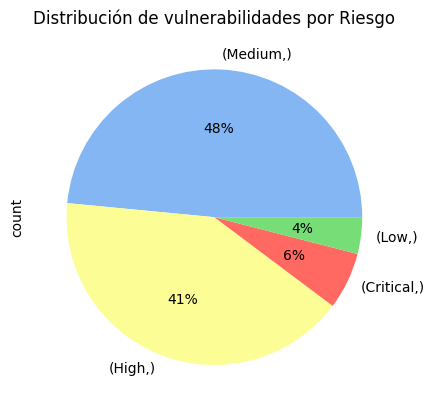

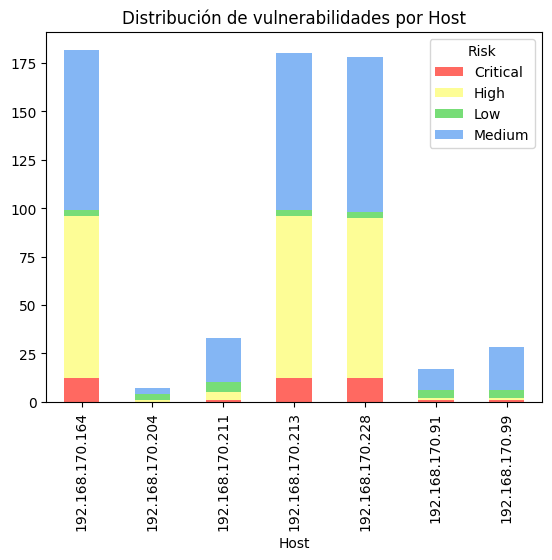

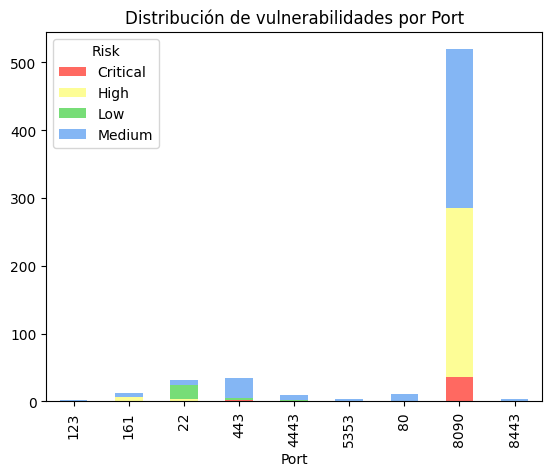

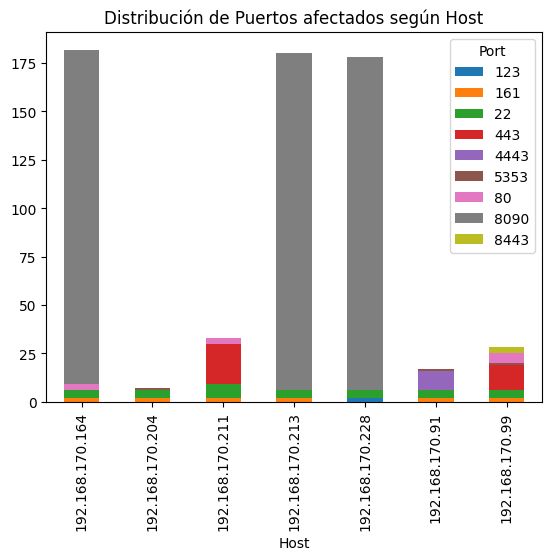

In [338]:
plot_gruopby(cl_scan_total)


### 3.2 Análisis de vulnerabilidades

Una vez obtenida la información general del dataset ya podemos observar los equipos, puertos y vulnerabilidades más repétidas, eso sí ahora se hará un análisis para comprobar la información obtenida y ver más a profundidad según el tipo de vulnerabilidad, esto debido a que es importante respetar y tratar de solucionar lo antes posible las vulnerabilidades que puedan ser más explotiables, en especial cuando ya se conoces exploits.

#### 3.2.1 Análisis de riesgo crítico

In [339]:
display_groupby(cl_scan_total.loc[cl_scan_total["Risk"] == "Critical"])

Cantidad de vulnerabilidades por host


Risk                      
                count unique       top freq
Host                                       
192.168.170.164    12      1  Critical   12
192.168.170.211     1      1  Critical    1
192.168.170.213    12      1  Critical   12
192.168.170.228    12      1  Critical   12
192.168.170.91      1      1  Critical    1
192.168.170.99      1      1  Critical    1

Host                             
         count unique              top freq
Risk                                       
Critical    39      6  192.168.170.164   12

Cantidad de vulverabilidades agrupado por puertos


Risk                        Host                             
     count unique       top freq count unique              top freq
Port                                                               
443      2      1  Critical    2     2      2   192.168.170.99    1
4443     1      1  Critical    1     1      1   192.168.170.91    1
8090    36      1  Critical   36    36      3  192.168.170.164   12

Vulnerabilidades más repetidas


CVE             Risk    
CVE-2016-0702   Critical    3
CVE-2016-0705   Critical    3
CVE-2016-0797   Critical    3
CVE-2016-0798   Critical    3
CVE-2016-0799   Critical    3
CVE-2016-0800   Critical    3
CVE-2016-2108   Critical    3
CVE-2023-25690  Critical    3
CVE-2023-27522  Critical    3
Name: count, dtype: int64

Nombre y soluciones


Risk                   \
                                                   count unique       top   
Name                                                                        
Apache 2.4.x < 2.4.56 Multiple Vulnerabilities         6      1  Critical   
OpenSSL 1.0.1 < 1.0.1o ASN.1 Encoder Negative Z...     3      1  Critical   
OpenSSL 1.0.1 < 1.0.1s Multiple Vulnerabilities...    18      1  Critical   
PHP 7.0.x < 7.0.16 Multiple Vulnerabilities            3      1  Critical   
PHP 7.0.x < 7.0.20 Multiple Vulnerabilities            3      1  Critical   
PHP Unsupported Version Detection                      3      1  Critical   
SSL Version 2 and 3 Protocol Detection                 3      1  Critical   

                                                        Solution         \
                                                   freq    count unique   
Name                                                                      
Apache 2.4.x < 2.4.56 Multiple Vulnerabilities        6        6      1   
OpenSSL 1.0.1 < 1.0.1o ASN.1 Encoder Negative Z...    3        3      1   
OpenSSL 1.0.1 < 1.0.1s Multiple Vulnerabilities...   18       18      1   
PHP 7.0.x < 7.0.16 Multiple Vulnerabilities           3        3      1   
PHP 7.0.x < 7.0.20 Multiple Vulnerabilities           3        3      1   
PHP Unsupported Version Detection                     3        3      1   
SSL Version 2 and 3 Protocol Detection                3        3      1   

                                                                                                       \
                                                                                                  top   
Name                                                                                                    
Apache 2.4.x < 2.4.56 Multiple Vulnerabilities             Upgrade to Apache version 2.4.56 or later.   
OpenSSL 1.0.1 < 1.0.1o ASN.1 Encoder Negative Z...        Upgrade to OpenSSL version 1.0.1o or later.   
OpenSSL 1.0.1 < 1.0.1s Multiple Vulnerabilities...        Upgrade to OpenSSL version 1.0.1s or later.   
PHP 7.0.x < 7.0.16 Multiple Vulnerabilities                   Upgrade to PHP version 7.0.16 or later.   
PHP 7.0.x < 7.0.20 Multiple Vulnerabilities                   Upgrade to PHP version 7.0.20 or later.   
PHP Unsupported Version Detection                   Upgrade to a version of PHP that is currently ...   
SSL Version 2 and 3 Protocol Detection              Consult the application's documentation to dis...   

                                                         
                                                   freq  
Name                                                     
Apache 2.4.x < 2.4.56 Multiple Vulnerabilities        6  
OpenSSL 1.0.1 < 1.0.1o ASN.1 Encoder Negative Z...    3  
OpenSSL 1.0.1 < 1.0.1s Multiple Vulnerabilities...   18  
PHP 7.0.x < 7.0.16 Multiple Vulnerabilities           3  
PHP 7.0.x < 7.0.20 Multiple Vulnerabilities           3  
PHP Unsupported Version Detection                     3  
SSL Version 2 and 3 Protocol Detection                3

Nombre y soluciones agrupadas por Host


Risk                        Name         \
                count unique       top freq count unique   
Host                                                       
192.168.170.164    12      1  Critical   12    12      6   
192.168.170.211     1      1  Critical    1     1      1   
192.168.170.213    12      1  Critical   12    12      6   
192.168.170.228    12      1  Critical   12    12      6   
192.168.170.91      1      1  Critical    1     1      1   
192.168.170.99      1      1  Critical    1     1      1   

                                                                         \
                                                               top freq   
Host                                                                      
192.168.170.164  OpenSSL 1.0.1 < 1.0.1s Multiple Vulnerabilitie...    6   
192.168.170.211             SSL Version 2 and 3 Protocol Detection    1   
192.168.170.213  OpenSSL 1.0.1 < 1.0.1s Multiple Vulnerabilitie...    6   
192.168.170.228  OpenSSL 1.0.1 < 1.0.1s Multiple Vulnerabilitie...    6   
192.168.170.91              SSL Version 2 and 3 Protocol Detection    1   
192.168.170.99              SSL Version 2 and 3 Protocol Detection    1   

                Solution         \
                   count unique   
Host                              
192.168.170.164       12      6   
192.168.170.211        1      1   
192.168.170.213       12      6   
192.168.170.228       12      6   
192.168.170.91         1      1   
192.168.170.99         1      1   

                                                                         
                                                               top freq  
Host                                                                     
192.168.170.164        Upgrade to OpenSSL version 1.0.1s or later.    6  
192.168.170.211  Consult the application's documentation to dis...    1  
192.168.170.213        Upgrade to OpenSSL version 1.0.1s or later.    6  
192.168.170.228        Upgrade to OpenSSL version 1.0.1s or later.    6  
192.168.170.91   Consult the application's documentation to dis...    1  
192.168.170.99   Consult the application's documentation to dis...    1

Con este análisis comprobamos lo anterior, acá se repite que los equipos más afectados por vulnerabilidades críticas son los mismos que están siendo afectados de forma general. Cada equipo presenta 12 vulnerabilidades críticas lo cual presenta un 92,3% (36/39) de las vulnerabilidades de esta índole.

Con respecto a los puertos nuevamente se presenta el 8090 como el más vulnerable nuevamente representando el mismo porcentaje (92,3%) que los 3 equipos principales.

A primera estancia, con respecto a la solución de estas podemos ver que en los equipos su prioridad sería actualizar su versión de OpenSSL para resolver gran parte de estas.

Y de forma general lás soluciones más prácticas para resolver la mayor cantidad de vulnerabilidaes críticas serían:

1. Actualizar Apache a la versión mínima de 2.4.56 (La actual y estable es 2.4.58)
2. Actualizar OpenSSL a la versión mínima de 1.0.1o (La actual y recomendada es 3.2.1)
3. Actualizar PHP a la versión mínima de 7.0.20 (La actual y recomendada es la 8.2 o 8.3)

#### 3.2.2 Análisis de riesgo alto

In [340]:
display_groupby(cl_scan_total.loc[cl_scan_total["Risk"] == "High"])

Cantidad de vulnerabilidades por host


Risk                  
                count unique   top freq
Host                                   
192.168.170.164    84      1  High   84
192.168.170.204     1      1  High    1
192.168.170.211     4      1  High    4
192.168.170.213    84      1  High   84
192.168.170.228    83      1  High   83
192.168.170.91      1      1  High    1
192.168.170.99      1      1  High    1

Host                             
     count unique              top freq
Risk                                   
High   258      7  192.168.170.164   84

Cantidad de vulverabilidades agrupado por puertos


Risk                    Host                             
     count unique   top freq count unique              top freq
Port                                                           
161      6      1  High    6     6      6   192.168.170.91    1
22       3      1  High    3     3      1  192.168.170.211    3
8090   249      1  High  249   249      3  192.168.170.164   83

Vulnerabilidades más repetidas


CVE             Risk
CVE-1999-0517   High    6
CVE-2021-44790  High    6
CVE-2006-20001  High    3
CVE-2010-5298   High    3
CVE-2014-0195   High    3
CVE-2014-0198   High    3
CVE-2014-0221   High    3
CVE-2014-0224   High    3
CVE-2014-3470   High    3
CVE-2014-3505   High    3
Name: count, dtype: int64

Nombre y soluciones


Risk                    \
                                                   count unique   top freq   
Name                                                                         
Apache 2.2.x < 2.2.33-dev / 2.4.x < 2.4.26 Mult...    15      1  High   15   
Apache 2.4.x < 2.4.39 Multiple Vulnerabilities        18      1  High   18   
Apache 2.4.x < 2.4.46 Multiple Vulnerabilities         9      1  High    9   
Apache 2.4.x < 2.4.47 Multiple Vulnerabilities        21      1  High   21   
Apache 2.4.x < 2.4.52 mod_lua Buffer Overflow          3      1  High    3   
Apache 2.4.x < 2.4.53 Multiple Vulnerabilities        12      1  High   12   
Apache 2.4.x < 2.4.54 Multiple Vulnerabilities        24      1  High   24   
Apache 2.4.x < 2.4.55 Multiple Vulnerabilities         9      1  High    9   
Apache 2.4.x < 2.4.58 Multiple Vulnerabilities         9      1  High    9   
Apache 2.4.x >= 2.4.7 / < 2.4.52 Forward Proxy ...     6      1  High    6   
Apache < 2.4.49 Multiple Vulnerabilities               6      1  High    6   
OpenSSL 1.0.1 < 1.0.1h Multiple Vulnerabilities       21      1  High   21   
OpenSSL 1.0.1 < 1.0.1i Multiple Vulnerabilities       27      1  High   27   
OpenSSL 1.0.1 < 1.0.1u Multiple Vulnerabilities...    33      1  High   33   
PHP 7.0.x < 7.0.19 Multiple Vulnerabilities            6      1  High    6   
PHP 7.0.x < 7.0.25 Multiple Vulnerabilities            6      1  High    6   
PHP 7.0.x < 7.0.28 Stack Buffer Overflow               3      1  High    3   
PHP 7.0.x < 7.0.31 Use After Free Arbitrary Cod...    12      1  High   12   
PHP 7.0.x < 7.0.33 Multiple vulnerabilities            6      1  High    6   
PHP < 7.1.33 / 7.2.x < 7.2.24 / 7.3.x < 7.3.11 ...     3      1  High    3   
SNMP Agent Default Community Name (public)             6      1  High    6   
SSH Protocol Version 1 Session Key Retrieval           3      1  High    3   

                                                   Solution         \
                                                      count unique   
Name                                                                 
Apache 2.2.x < 2.2.33-dev / 2.4.x < 2.4.26 Mult...       15      1   
Apache 2.4.x < 2.4.39 Multiple Vulnerabilities           18      1   
Apache 2.4.x < 2.4.46 Multiple Vulnerabilities            9      1   
Apache 2.4.x < 2.4.47 Multiple Vulnerabilities           21      1   
Apache 2.4.x < 2.4.52 mod_lua Buffer Overflow             3      1   
Apache 2.4.x < 2.4.53 Multiple Vulnerabilities           12      1   
Apache 2.4.x < 2.4.54 Multiple Vulnerabilities           24      1   
Apache 2.4.x < 2.4.55 Multiple Vulnerabilities            9      1   
Apache 2.4.x < 2.4.58 Multiple Vulnerabilities            9      1   
Apache 2.4.x >= 2.4.7 / < 2.4.52 Forward Proxy ...        6      1   
Apache < 2.4.49 Multiple Vulnerabilities                  6      1   
OpenSSL 1.0.1 < 1.0.1h Multiple Vulnerabilities          21      1   
OpenSSL 1.0.1 < 1.0.1i Multiple Vulnerabilities          27      1   
OpenSSL 1.0.1 < 1.0.1u Multiple Vulnerabilities...       33      1   
PHP 7.0.x < 7.0.19 Multiple Vulnerabilities               6      1   
PHP 7.0.x < 7.0.25 Multiple Vulnerabilities               6      1   
PHP 7.0.x < 7.0.28 Stack Buffer Overflow                  3      1   
PHP 7.0.x < 7.0.31 Use After Free Arbitrary Cod...       12      1   
PHP 7.0.x < 7.0.33 Multiple vulnerabilities               6      1   
PHP < 7.1.33 / 7.2.x < 7.2.24 / 7.3.x < 7.3.11 ...        3      1   
SNMP Agent Default Community Name (public)                6      1   
SSH Protocol Version 1 Session Key Retrieval              3      1   

                                                                                                       \
                                                                                                  top   
Name                                                                                                    
Apache 2.2.x < 2.2.33-dev / 2.4.x <

Nombre y soluciones agrupadas por Host


Risk                    Name         \
                count unique   top freq count unique   
Host                                                   
192.168.170.164    84      1  High   84    84     21   
192.168.170.204     1      1  High    1     1      1   
192.168.170.211     4      1  High    4     4      2   
192.168.170.213    84      1  High   84    84     21   
192.168.170.228    83      1  High   83    83     20   
192.168.170.91      1      1  High    1     1      1   
192.168.170.99      1      1  High    1     1      1   

                                                                         \
                                                               top freq   
Host                                                                      
192.168.170.164  OpenSSL 1.0.1 < 1.0.1u Multiple Vulnerabilitie...   11   
192.168.170.204         SNMP Agent Default Community Name (public)    1   
192.168.170.211       SSH Protocol Version 1 Session Key Retrieval    3   
192.168.170.213  OpenSSL 1.0.1 < 1.0.1u Multiple Vulnerabilitie...   11   
192.168.170.228  OpenSSL 1.0.1 < 1.0.1u Multiple Vulnerabilitie...   11   
192.168.170.91          SNMP Agent Default Community Name (public)    1   
192.168.170.99          SNMP Agent Default Community Name (public)    1   

                Solution         \
                   count unique   
Host                              
192.168.170.164       84     20   
192.168.170.204        1      1   
192.168.170.211        4      2   
192.168.170.213       84     20   
192.168.170.228       83     19   
192.168.170.91         1      1   
192.168.170.99         1      1   

                                                                         
                                                               top freq  
Host                                                                     
192.168.170.164  Upgrade to OpenSSL version 1.0.1u or later.\n\...   11  
192.168.170.204  Disable the SNMP service on the remote host if...    1  
192.168.170.211  Disable compatibility with version 1 of the SS...    3  
192.168.170.213  Upgrade to OpenSSL version 1.0.1u or later.\n\...   11  
192.168.170.228  Upgrade to OpenSSL version 1.0.1u or later.\n\...   11  
192.168.170.91   Disable the SNMP service on the remote host if...    1  
192.168.170.99   Disable the SNMP service on the remote host if...    1

Nuevamente se repite los equipos antes mencionados. Cada equipo presenta 84 aproximadamente de las vulnerabilidades altas lo cual presenta un 97.3% (251/258).

El puerto 8090 también se repite como el más vulnerable alcanzando un 96,5% (249/258) de las vulnerabilidades totales de riesgo alto.

Y al analizar las soluciones por equipo nuevamente se repite que la gran mayoría necesita la actulización de OpenSSL a una versión más actualizada.

Y de forma general lás soluciones más prácticas para resolver la mayor cantidad de vulnerabilidaes altas serían:

1. Actualizar Apache a la versión mínima de 2.4.58 (La actual y estable es 2.4.58)
2. Actualizar OpenSSL a la versión mínima de 1.0.1 (La actual y recomendada es 3.2.1)
3. Actualizar PHP a la versión mínima de 7.0.23 (La actual y recomendada es la 8.2 o 8.3)
4. Revisar el tema de llaves y agentes públicos.

#### 3.2.3 Análisis de riesgo Medio

In [341]:
display_groupby(cl_scan_total.loc[cl_scan_total["Risk"] == "Medium"])

Cantidad de vulnerabilidades por host


Risk                    
                count unique     top freq
Host                                     
192.168.170.164    83      1  Medium   83
192.168.170.204     3      1  Medium    3
192.168.170.211    23      1  Medium   23
192.168.170.213    81      1  Medium   81
192.168.170.228    80      1  Medium   80
192.168.170.91     11      1  Medium   11
192.168.170.99     22      1  Medium   22

Host                             
       count unique              top freq
Risk                                     
Medium   303      7  192.168.170.164   83

Cantidad de vulverabilidades agrupado por puertos


Risk                      Host                             
     count unique     top freq count unique              top freq
Port                                                             
123      2      1  Medium    2     2      1  192.168.170.228    2
161      6      1  Medium    6     6      6   192.168.170.91    1
22       7      1  Medium    7     7      7   192.168.170.91    1
443     29      1  Medium   29    29      2  192.168.170.211   18
4443     8      1  Medium    8     8      1   192.168.170.91    8
5353     3      1  Medium    3     3      3   192.168.170.91    1
80      11      1  Medium   11    11      3   192.168.170.99    5
8090   234      1  Medium  234   234      3  192.168.170.213   79
8443     3      1  Medium    3     3      1   192.168.170.99    3

Vulnerabilidades más repetidas


CVE            Risk  
CVE-2003-1567  Medium    9
CVE-2004-2320  Medium    9
CVE-2010-0386  Medium    9
CVE-2008-4309  Medium    6
CVE-2015-4000  Medium    6
CVE-2016-2183  Medium    6
CVE-2014-3566  Medium    4
CVE-2015-0204  Medium    4
CVE-2013-2566  Medium    3
CVE-2014-0076  Medium    3
Name: count, dtype: int64

Nombre y soluciones


Risk                      \
                                                   count unique     top freq   
Name                                                                           
Apache 2.4.x < 2.4.27 Multiple Vulnerabilities         6      1  Medium    6   
Apache 2.4.x < 2.4.28 HTTP Vulnerability (Optio...     3      1  Medium    3   
Apache 2.4.x < 2.4.33 Multiple Vulnerabilities        21      1  Medium   21   
Apache 2.4.x < 2.4.34 Multiple Vulnerabilities         6      1  Medium    6   
Apache 2.4.x < 2.4.35 DoS                              3      1  Medium    3   
Apache 2.4.x < 2.4.38 Multiple Vulnerabilities         9      1  Medium    9   
Apache 2.4.x < 2.4.41 Multiple Vulnerabilities        18      1  Medium   18   
Apache 2.4.x < 2.4.42 Multiple Vulnerabilities         6      1  Medium    6   
Apache < 2.4.49 Multiple Vulnerabilities               3      1  Medium    3   
Apache >= 2.4.17 < 2.4.49 mod_http2                    3      1  Medium    3   
Apache mod_status /server-status Information Di...     1      1  Medium    1   
HTTP TRACE / TRACK Methods Allowed                    27      1  Medium   27   
JQuery 1.2 < 3.5.0 Multiple XSS                        4      1  Medium    4   
Network Time Protocol (NTP) Mode 6 Scanner             1      1  Medium    1   
Network Time Protocol Daemon (ntpd) monlist Com...     1      1  Medium    1   
OpenSSL 1.0.1 < 1.0.1g Multiple Vulnerabilities...     6      1  Medium    6   
OpenSSL 1.0.1 < 1.0.1j Multiple Vulnerabilities...    12      1  Medium   12   
OpenSSL 1.0.1 < 1.0.1k Multiple Vulnerabilities...    24      1  Medium   24   
OpenSSL 1.0.1 < 1.0.1m Multiple Vulnerabilities       24      1  Medium   24   
OpenSSL 1.0.1 < 1.0.1n Multiple Vulnerabilities...    18      1  Medium   18   
OpenSSL 1.0.1 < 1.0.1p Multiple Vulnerabilities        6      1  Medium    6   
OpenSSL 1.0.1 < 1.0.1q Multiple DoS                    6      1  Medium    6   
OpenSSL 1.0.1 < 1.0.1r Multiple Vulnerabilities...     6      1  Medium    6   
OpenSSL 1.0.1 < 1.0.1t Multiple Vulnerabilities       15      1  Medium   15   
OpenSSL < 1.0.2i Default Weak 64-bit Block Ciph...     3      1  Medium    3   
OpenSSL SSL_OP_NETSCAPE_REUSE_CIPHER_CHANGE_BUG...     1      1  Medium    1   
PHP 7.0.x < 7.0.30 Multiple Vulnerabilities           15      1  Medium   15   
PHP 7.0.x < 7.0.32 Transfer-Encoding Parameter ...     3      1  Medium    3   
PHP < 7.3.24 Multiple Vulnerabilities                  3      1  Medium    3   
PHP < 7.3.28 Email Header Injection                    3      1  Medium    3   
SNMP 'GETBULK' Reflection DDoS                         6      1  Medium    6   
SSH Weak Algorithms Supported                          7      1  Medium    7   
SSL / TLS Renegotiation Handshakes MiTM Plainte...     1      1  Medium    1   
SSL Certificate Cannot Be Trusted                      3      1  Medium    3   
SSL Certificate Expiry                                 3      1  Medium    3   
SSL Certificate Signed Using Weak Hashing Algor...     2      1  Medium    2   
SSL DROWN Attack Vulnerability (Decrypting RSA ...     1      1  Medium    1   
SSL Medium Strength Cipher Suites Supported (SW...     3      1  Medium    3   
SSL RC4 Cipher Suites Supported (Bar Mitzvah)          6      1  Medium    6   
SSL Self-Signed Certificate                            3      1  Medium    3   
SSL Weak Cipher Suites Supported                       2      1  Medium    2   
SSL/TLS EXPORT_RSA <= 512-bit Cipher Suites Sup...     1      1  Medium    1   
SSLv3 Padding Oracle On Downgraded Legacy Encry...     1      1  Medium    1   
TLS Version 1.0 Protocol Detection                     3      1  Medium    3   
TLS Version 1.1 Protocol Deprecated                    1      1  Medium    1   
mDNS Detection (Remote Network)                        3      1  Medium    3   

                                                   Solution         \
                                                      count u

Nombre y soluciones agrupadas por Host


Risk                      Name         \
                count unique     top freq count unique   
Host                                                     
192.168.170.164    83      1  Medium   83    83     28   
192.168.170.204     3      1  Medium    3     3      3   
192.168.170.211    23      1  Medium   23    23     16   
192.168.170.213    81      1  Medium   81    81     28   
192.168.170.228    80      1  Medium   80    80     28   
192.168.170.91     11      1  Medium   11    11     10   
192.168.170.99     22      1  Medium   22    22     12   

                                                                         \
                                                               top freq   
Host                                                                      
192.168.170.164  OpenSSL 1.0.1 < 1.0.1k Multiple Vulnerabilitie...    8   
192.168.170.204                    mDNS Detection (Remote Network)    1   
192.168.170.211                 HTTP TRACE / TRACK Methods Allowed    6   
192.168.170.213  OpenSSL 1.0.1 < 1.0.1k Multiple Vulnerabilitie...    8   
192.168.170.228  OpenSSL 1.0.1 < 1.0.1k Multiple Vulnerabilitie...    8   
192.168.170.91       SSL RC4 Cipher Suites Supported (Bar Mitzvah)    2   
192.168.170.99                  HTTP TRACE / TRACK Methods Allowed    9   

                Solution         \
                   count unique   
Host                              
192.168.170.164       83     27   
192.168.170.204        3      3   
192.168.170.211       23     15   
192.168.170.213       81     27   
192.168.170.228       80     27   
192.168.170.91        11      9   
192.168.170.99        22     11   

                                                                         
                                                               top freq  
Host                                                                     
192.168.170.164                Upgrade to OpenSSL 1.0.1k or later.    8  
192.168.170.204  Filter incoming traffic to UDP port 5353, if d...    1  
192.168.170.211  Disable these HTTP methods. Refer to the plugi...    6  
192.168.170.213                Upgrade to OpenSSL 1.0.1k or later.    8  
192.168.170.228                Upgrade to OpenSSL 1.0.1k or later.    8  
192.168.170.91   Purchase or generate a proper SSL certificate ...    2  
192.168.170.99   Disable these HTTP methods. Refer to the plugi...    9

Nuevamente se repite los equipos antes mencionados. Cada equipo presenta 80-83 aproximadamente de las vulnerabilidades medias lo cual presenta un 80,5% (244/303) lo cual a pesar de ser alto se nota una baja en comparación a los porcentajes anteriores, por lo cual está un poco más distribuidos.

El puerto 8090 también se repite como el más vulnerable alcanzando un 77,2% (234/303) de las vulnerabilidades totales de riesgo medio.

A pesar de que nuevamente vemos como la actualización de OpenSSL para los equipos más afectados se muestra como solución principal, empezamos a ver como otros sistemas tienen problemas de red como métodos de HTTP los cuales deben ser desabilitaos o en el caso del equipo 192.168.170.204 tiene problemas con mDNS (Multicast DNS).

Y de forma general lás soluciones más prácticas para resolver la mayor cantidad de vulnerabilidaes altas serían:

1. Actualizar OpenSSL a la versión mínima de 1.0.1 (La actual y recomendada es 3.2.1)
2. Desabilitar métodos HTTP Trace/Track
3. Comprar o generar una licencia de SSL.

#### 3.2.4 Análisis especifico

Se obtienen distintos dataset de los scans para obtener de una forma más espeficida los top de vulnerabilidades por cada host, de esta manera no solo centrarse en las que salen actualmente y la solución previa, si no, para ver los casos de otros los cuales no hayan salido anteriormente.

In [345]:
scan_H213 = cl_scan_total.loc[cl_scan_total["Host"] == "192.168.170.213"]
scan_H164 = cl_scan_total.loc[cl_scan_total["Host"] == "192.168.170.164"]
scan_H228 = cl_scan_total.loc[cl_scan_total["Host"] == "192.168.170.228"]

Se muestran a continuación las vulnerabilidades a más detalle por cada host para obtener información de los problemas, descripcción y las soluciones posibles.

In [354]:
print("Host .213" + "\n")
get_risk_ptype(scan_H213)
print()
print("Host .213" + "\n")
get_risk_ptype(scan_H164)
print()
print("Host .213" + "\n")
get_risk_ptype(scan_H228)

Host .213

High Risk


CVE             Risk  Host             Protocol  Port  Name                                                       Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

Medium Risk


CVE             Risk    Host             Protocol  Port  Name                                                      Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

Critical Risk


CVE             Risk      Host             Protocol  Port  Name                                                                   Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

Low Risk


CVE            Risk  Host             Protocol  Port  Name                                 Description                                                                                                                                                                                                                                                                                        Solution                                                                                                                                 
CVE-2008-5161  Low   192.168.170.213  tcp       22    SSH Server CBC Mode Ciphers Enabled  The SSH server is configured to support Cipher Block Chaining (CBC)\nencryption.  This may allow an attacker to recover the plaintext message\nfrom the ciphertext. \n\nNote that this plugin only checks for the options of the SSH server and\ndoes not check for vulnerable software versions.  Contact the vendor or consult product documentation to disable CBC mode\ncipher encryption, and en


Host .213

High Risk


CVE             Risk  Host             Protocol  Port  Name                                                       Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

Medium Risk


CVE             Risk    Host             Protocol  Port  Name                                             Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

Critical Risk


CVE             Risk      Host             Protocol  Port  Name                                                                   Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

Low Risk


CVE            Risk  Host             Protocol  Port  Name                                 Description                                                                                                                                                                                                                                                                                        Solution                                                                                                                                 
CVE-2008-5161  Low   192.168.170.164  tcp       22    SSH Server CBC Mode Ciphers Enabled  The SSH server is configured to support Cipher Block Chaining (CBC)\nencryption.  This may allow an attacker to recover the plaintext message\nfrom the ciphertext. \n\nNote that this plugin only checks for the options of the SSH server and\ndoes not check for vulnerable software versions.  Contact the vendor or consult product documentation to disable CBC mode\ncipher encryption, and en


Host .213

High Risk


CVE             Risk  Host             Protocol  Port  Name                                                       Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

Medium Risk


CVE             Risk    Host             Protocol  Port  Name                                                      Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

Critical Risk


CVE             Risk      Host             Protocol  Port  Name                                                                   Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

Low Risk


CVE            Risk  Host             Protocol  Port  Name                                 Description                                                                                                                                                                                                                                                                                        Solution                                                                                                                                 
CVE-2008-5161  Low   192.168.170.228  tcp       22    SSH Server CBC Mode Ciphers Enabled  The SSH server is configured to support Cipher Block Chaining (CBC)\nencryption.  This may allow an attacker to recover the plaintext message\nfrom the ciphertext. \n\nNote that this plugin only checks for the options of the SSH server and\ndoes not check for vulnerable software versions.  Contact the vendor or consult product documentation to disable CBC mode\ncipher encryption, and en

En contreto a los host obtenemos lo siguiente.

1. 192.168.170.213: En este caso el puerto 8090 es el más afectado, pero además se observa que el 161 también sale la lista siendo el primero lo que causa la impresión de que podría ser más crítico de lo que se pensaba. Las soluciones a aplicar para este host son las siguientes:
    - Actualizar Apache a la versión mínima de 2.4.47 (La actual y estable es 2.4.58)
    - Actualizar OpenSSL a la versión mínima de 1.0.1s (La actual y recomendada es 3.2.1)
    - Actualizar PHP a la versión mínima de 7.0.30 (La actual y recomendada es la 8.2 o 8.3)
    - Desabilitar métodos TRACE y TRACK de HTTP los cuales se utilizan para debuguiar y no deberían estar en producción.
    - Si no se está utlizando el servicio SNMP en el host remoto deshabilitarlo o si no filtrar los paquetes UDP.


2. 192.168.170.164: Acá podemos observar que además del puerto 8090 el puerto 161 (vulnerabilidades altas) y 80 (vulnerabilidades medias) también tienen problemas. Las soluciones a presentar son las mismas que para el host anterior.


3. 192.168.170.228: Para este Host el puerto más afectado es casi al 100% el 8090 por lo cual se recomiendan las mismas soluciones.

En caso de ser necesario se pueden obtener los subgráficos de los mostrados anteriormente pero especificados por Host.

In [344]:
# print("Host .213")
# plot_gruopby(scan_H213)
# print("Host .164")
# plot_gruopby(scan_H164)
# print("Host .228")
# plot_gruopby(scan_H228)

## 4. Conclusión

Una vez ya analizado los sistemas pudimos observar que se puede resolver la mayor cantidad de vulnerabilidades actualizando los sistemas en especial los principales 3 equipos que están siendo afectados se estarán resolviendo un 86,4% (540/625) de las vunerabilidades totales. Por lo tanto como solución y plan de trabajo se presenta lo siguiente (Ordenado por prioridad):

1. Actualizar OpenSSL a la versión mínima de 1.0.1s (La actual y recomendada es 3.2.1)
2. Actualizar Apache a la versión mínima de 2.4.47 (La actual y estable es 2.4.58)
3. Actualizar PHP a la versión mínima de 7.0.30 (La actual y recomendada es la 8.2 o 8.3)
4. Desabilitar métodos TRACE y TRACK de HTTP los cuales se utilizan para debuguiar y no deberían estar en producción.
5. Si no se está utlizando el servicio SNMP en el host remoto deshabilitarlo o si no filtrar los paquetes UDP.
6. En el servidor SSH deshabilitar CBC y habilitar CTR o GCM.

Para fúturo aplicar una nueva política y control para la actulización de sistemas.

| La pólitica de actualización de sistemas |
| ---------------------------------------- |
| En un determinado periodo de tiempo se debe estar al tanto de las correcciones y parches que lanzan los fabricantes de los programas e implementarlos lo antes posible. |

## 5. Trabajo a futuro posible

1. Implementar API con CVE para obtener información sobre categoría y probabilidad de explotación automáticamente (Si no, con scrapping)
2. Obtener más información sobre las vulnerabilidades no reconocidas.

* Referencias

1. https://pandas.pydata.org/docs/user_guide/index.
2. https://www.cvedetails.com
3. https://cve.mitre.org/cve/search_cve_list.html
4. https://httpd.apache.org
5. https://www.openssl.org
6. https://www.php.net/supported-versions.php